In [1]:
include <- function(pkg) {
  if (!suppressMessages(require(pkg, character.only = TRUE)))
    install.packages(pkg, character.only = TRUE)
  suppressMessages(library(pkg, pkg, character.only = TRUE))
}
include("dplyr")
include("scoper")
include("alakazam")

In [2]:
tsv <- "/data/samples/AIRR-Seq/OURS/S3987Nr1/S3987Nr1-PBMC_heavy/changeo_igblast/S3987Nr1-PBMC_heavy_f_parse-select_with_translation.tsv"
db <- alakazam::readChangeoDb(tsv)
dim(db)

[1] 13041    61

In [3]:
time_spectral <- function(db) {
  time <- system.time({
      tryCatch({
              print(paste0("Timing: max_iter=1k, size=", dim(db)[1]))
              scoper::spectralClones(db, "vj", verbose=FALSE)
          },
          warning=function(cond) {
              iter_max_warning = 30000
              nstart_warning = 10000
              print(paste0(
                  "Warning issued. Retrying with iter_max=", iter_max_warning,
                  "; nstart=", nstart_warning
              ))
              scoper::spectralClones(
                  db,
                  "vj",
                  verbose = FALSE, 
                  iter_max = iter_max_warning,
                  nstart = nstart_warning)
          }
      )
    
  })
  return(time)
}

In [4]:
sample_sizes = seq(1000, 13000, 2000)
times <- sapply(
  sample_sizes,
  function(n) {time_spectral(dplyr::sample_n(db, n))}
)

res = data.frame(sample_sizes, times[1, ])
colnames(res) = c("n", "time")
head(res)

[1] "Timing: max_iter=1k, size=1000"


Running defineClonesScoper in bulk mode



[1] "Timing: max_iter=1k, size=3000"


Running defineClonesScoper in bulk mode



[1] "Timing: max_iter=1k, size=5000"


Running defineClonesScoper in bulk mode



[1] "Timing: max_iter=1k, size=7000"


Running defineClonesScoper in bulk mode



[1] "Timing: max_iter=1k, size=9000"


Running defineClonesScoper in bulk mode



[1] "Timing: max_iter=1k, size=11000"


Running defineClonesScoper in bulk mode



[1] "Timing: max_iter=1k, size=13000"


Running defineClonesScoper in bulk mode



,n,time
,<dbl>,<dbl>
1,1000,21.974
2,3000,47.935
3,5000,126.617
4,7000,178.980
5,9000,268.891
6,11000,392.668


In [5]:
m <- lm(time ~ n, res)
m


Call:
lm(formula = time ~ n, data = res)

Coefficients:
(Intercept)            n  
  -68.48439      0.04158  


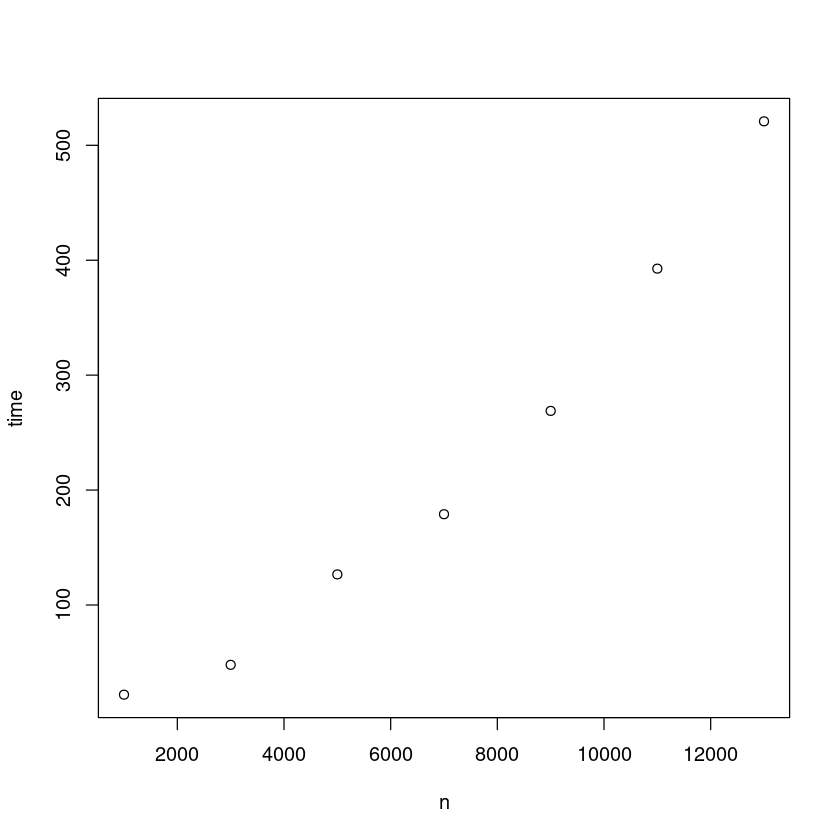

In [6]:
plot(res)

In [7]:
tsv2 <- "/data/samples/AIRR-Seq/OURS/S3987Nr2/S3987Nr2-PBMC_heavy/changeo_igblast/S3987Nr2-PBMC_heavy_f_parse-select_with_translation.tsv"
db2 <- alakazam::readChangeoDb(tsv2)
dim(db2)

[1] 172581     61

In [8]:
sample_sizes2 = seq(100000, 170000, 10000)
times2 <- sapply(
  sample_sizes2,
  function(n) {time_spectral(dplyr::sample_n(db2, n))}
)

res2 = data.frame(sample_sizes2, times2[1, ])

[1] "Timing: max_iter=1k, size=100000"


Running defineClonesScoper in bulk mode

Timing stopped at: 1.559e+04 350.4 2993



In [ ]:
colnames(res2) <- c("n", "time")
res2

In [ ]:
m <- lm(time ~ n, res2)
m

In [ ]:
predict(m, data.frame(n = 200000))